In [49]:
from keras.layers import Dense, LSTM, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import numpy as np

In [2]:
ls deeplog-hdfs

col_header.txt  hdfs_test_abnormal  hdfs_train  mlabel.txt  nameIndex.txt


In [4]:
with open("deeplog-hdfs/hdfs_train", 'r') as f:
    data = f.readlines()

In [9]:
train_data = []
for i in data:
    ts = i.strip().split()
    if len(ts) == 0 :
        pass
    else:
        train_data.append(np.array([int(t) for t in ts]))

In [97]:
with open("deeplog-hdfs/hdfs_test_abnormal", 'r') as f:
    data = f.readlines()
    
test_anomaly = []
for i in data:
    ts = i.strip().split()
    if len(ts) == 0 :
        pass
    else:
        test_anomaly.append(np.array([int(t) for t in ts]))

print("Anomalies:", len(test_anomaly))
        
with open("deeplog-hdfs/hdfs_test_normal", 'r') as f:
    data = f.readlines()
    
test_normal = []
for i in data:
    ts = i.strip().split()
    if len(ts) == 0 :
        pass
    else:
        test_normal.append(np.array([int(t) for t in ts]))

Anomalies: 16838


In [98]:
'''
hyper parameters

h: time window
g: cutoff in the prediction probabilities
l: num of lstm layers
a: num of lstm units in a layer
k: num of log keys (i.e, templates)
'''

h = 10
g = 9
l = 2
a = 64
k = 29

In [43]:
x_train = []
y_train = []
for t in train_data:
    for st in range(len(t) - h):
        x_train.append(np.array([to_categorical(x-1, num_classes=k) for x in t[st:st+h]]))
        y_train.append(to_categorical(t[st+h]-1, num_classes=k))
        
x_train = np.array(x_train)
y_train = np.array(y_train)

In [102]:
from tqdm import tqdm as tqdm

x_test = []
y_test = []
for t in tqdm(test_anomaly):
    tmp_x = []
    tmp_y = []
    for st in range(len(t) - h):
        tmp_x.append(np.array([to_categorical(x-1, num_classes=k) for x in t[st:st+h]]))
        tmp_y.append(to_categorical(t[st+h]-1, num_classes=k))
    x_test.append(tmp_x)
    y_test.append(tmp_y)
        
# x_test = np.array(x_test)
# y_test = np.array(y_test)

x_test2 = []
y_test2 = []
for t in tqdm(test_normal):
    tmp_x = [] 
    tmp_y = []
    for st in range(len(t) - h):
        tmp_x.append(np.array([to_categorical(x-1, num_classes=k) for x in t[st:st+h]]))
        tmp_y.append(to_categorical(t[st+h]-1, num_classes=k))
    x_test2.append(tmp_x)
    y_test2.append(tmp_y)
        
# x_test2 = np.array(x_test2)
# y_test2 = np.array(y_test2)

  4%|▎         | 20486/553366 [00:18<08:10, 1085.81it/s]

KeyboardInterrupt: 

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test2.shape)
print(y_test2.shape)

In [46]:
input_layer = Input(shape=(h, k))
lstm_layer = LSTM(a, return_sequences=True)(input_layer)
lstm_layer = LSTM(a)(lstm_layer)
output_layer = Dense(k, activation="softmax")(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10, 29)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 64)            24064     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 29)                1885      
Total params: 58,973
Trainable params: 58,973
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
model.fit(x_train, y_train, batch_size=256, epochs=80, callbacks=[ReduceLROnPlateau(monitor='loss', verbose=1)])

Epoch 1/80
46573/46573 [==============================] - 4s 95us/step - loss: 1.1534 - acc: 0.6689
Epoch 2/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.4353 - acc: 0.8309
Epoch 3/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.3698 - acc: 0.8651
Epoch 4/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.3322 - acc: 0.8729
Epoch 5/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.3083 - acc: 0.8769
Epoch 6/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.2907 - acc: 0.8832
Epoch 7/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.2751 - acc: 0.8909
Epoch 8/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.2652 - acc: 0.8977
Epoch 9/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.2564 - acc: 0.9002
Epoch 10/80
46573/46573 [==============================] - 4s 84us/step - loss: 0.2502 - acc: 0.9029

In [51]:
history = model.history.history

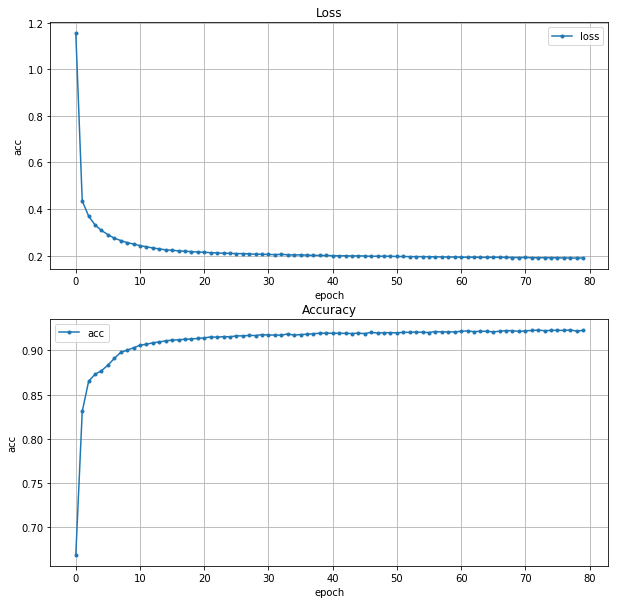

In [52]:
import  matplotlib.pyplot  as plt

# plot results
loss = history['loss']
# val_loss = history.history['val_loss']

acc = history['acc']
# val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
# plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
# plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [54]:
pred = model.predict(x_test)

In [112]:
cands

[array([25, 10,  2, 22,  1, 15, 24, 21, 17]),
 array([25, 10, 24, 17,  2,  1, 21, 22, 15]),
 array([25, 10, 17, 24,  2, 21, 22,  1,  3]),
 array([22,  3,  1,  2, 24, 20, 17, 25, 21]),
 array([ 2,  3,  1, 22, 24,  8, 17, 20,  5]),
 array([ 2,  3, 22,  1,  8, 24, 25, 20, 21]),
 array([ 1, 22,  3,  2, 24, 20, 25, 17,  8]),
 array([22,  1,  3,  2, 24, 20, 17, 25, 15]),
 array([22,  1,  3,  2, 20, 25, 24, 10, 15]),
 array([22,  1,  3, 20,  2, 10, 24, 25, 15]),
 array([20,  1, 22,  3,  2, 24, 10,  4, 15]),
 array([20,  1,  3,  2, 24, 22, 15, 25, 10]),
 array([20,  3,  1,  2, 24, 15, 25, 22,  5]),
 array([20,  3,  2, 24,  1, 25, 15, 10, 22]),
 array([20,  3,  2, 24,  1, 15,  5, 25, 10])]

In [124]:
# anomaly = []
# normal = []

results = []
for block, y in zip(x_test, y_test):
    if len(block) != 0:
        pred = model.predict(np.array(block))
        cands = [np.argsort(p)[::-1][:g] for p in pred]

        gts = [np.argmax(t) for t in y]

        # true -> normal, false -> anomaly
        result = all([True if gts[i] in cands[i]  else False for i in range(len(gts))])
        results.append(result)

In [127]:
len(x_test)

16838

In [129]:
import collections
collections.Counter(results)

Counter({False: 10501, True: 144})

## PCA

In [131]:
with open("deeplog-hdfs/hdfs_train", 'r') as f:
    data = f.readlines()
    
train_data = []
for i in data:
    ts = i.strip().split()
    if len(ts) == 0 :
        pass
    else:
        train_data.append(np.array([int(t) for t in ts]))

with open("deeplog-hdfs/hdfs_test_abnormal", 'r') as f:
    data = f.readlines()
    
test_anomaly = []
for i in data:
    ts = i.strip().split()
    if len(ts) == 0 :
        pass
    else:
        test_anomaly.append(np.array([int(t) for t in ts]))

print("Anomalies:", len(test_anomaly))
        
# with open("deeplog-hdfs/hdfs_test_normal", 'r') as f:
#     data = f.readlines()
    
# test_normal = []
# for i in data:
#     ts = i.strip().split()
#     if len(ts) == 0 :
#         pass
#     else:
#         test_normal.append(np.array([int(t) for t in ts]))

Anomalies: 16838


In [148]:
pca_train = []
for i in train_data:
    counts = collections.Counter(i)
    row = np.zeros(k)
    for key,value in counts.items():
        row[key-1] = value
    pca_train.append(row)
    
    
pca_test = []
for i in test_anomaly:
    counts = collections.Counter(i)
    row = np.zeros(k)
    for key,value in counts.items():
        row[key-1] = value
    pca_test.append(row)

In [142]:
np.array(pca_train).shape

(4855, 29)

In [144]:
from sklearn.decomposition import PCA
import time

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import numpy as np

%matplotlib inline

st = time.time()
pca = PCA(svd_solver="full")

reduced_data = pca.fit_transform(pca_train)

print("time:", time.time() - st)
print(reduced_data.shape)
print(pca.components_.shape)
print(pca.explained_variance_ratio_.shape)
print(pca.components_.mean())
print(np.sum(pca.components_ == 0.) / (1440*1440))

## check variance captured

color = 'rgba(217, 217, 217, 0.14)'

traces = []

traces.append(go.Scatter(
    x=np.arange(pca.explained_variance_ratio_.shape[0]),
    y=pca.explained_variance_ratio_,
    mode='lines+markers',
    marker=dict(size=6, line=dict(color=color, width=0.3), opacity=0.8)
))

plot_data = traces
layout = go.Layout(
        title="variance captured",
        xaxis=dict(title="x"),
        yaxis=dict(title="y")
)
fig = go.Figure(data=plot_data, layout=layout)
py.iplot(fig)

time: 0.026845216751098633
(4855, 29)
(29, 29)
(29,)
0.011206625989657722
0.0001808449074074074


In [154]:
### for normal

centered_data = pca_train - np.mean(pca_train, axis=0)

# split to normal and anomaly space
st  = time.time()
num_normal_components = 5

P = pca.components_[:num_normal_components].T
mapper = np.dot(P, P.T)
ones = np.eye(k)

def spe(x):
#     reconst = np.dot((np.eye(1440) - np.dot(P, P.T)), x)
    reconst = np.dot(ones - mapper, x)
    return np.linalg.norm(reconst)**2

norm_errors = [spe(x) for x in centered_data]
    
print("time:", time.time() - st)


#### for anomaly
centered_data = pca_test - np.mean(pca_test, axis=0)

# split to normal and anomaly space
st  = time.time()
num_normal_components = 5

P = pca.components_[:num_normal_components].T
mapper = np.dot(P, P.T)
ones = np.eye(k)

def spe(x):
#     reconst = np.dot((np.eye(1440) - np.dot(P, P.T)), x)
    reconst = np.dot(ones - mapper, x)
    return np.linalg.norm(reconst)**2

errors = [spe(x) for x in centered_data]
    
print("time:", time.time() - st)

time: 0.04120039939880371
time: 0.14377999305725098


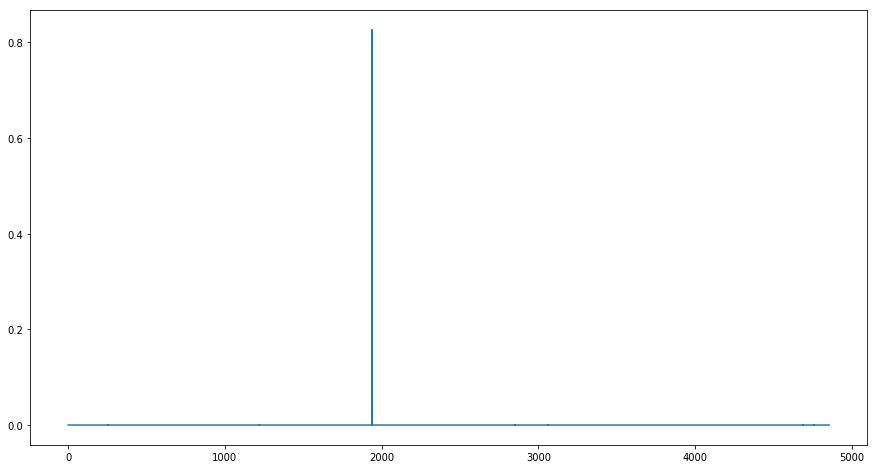

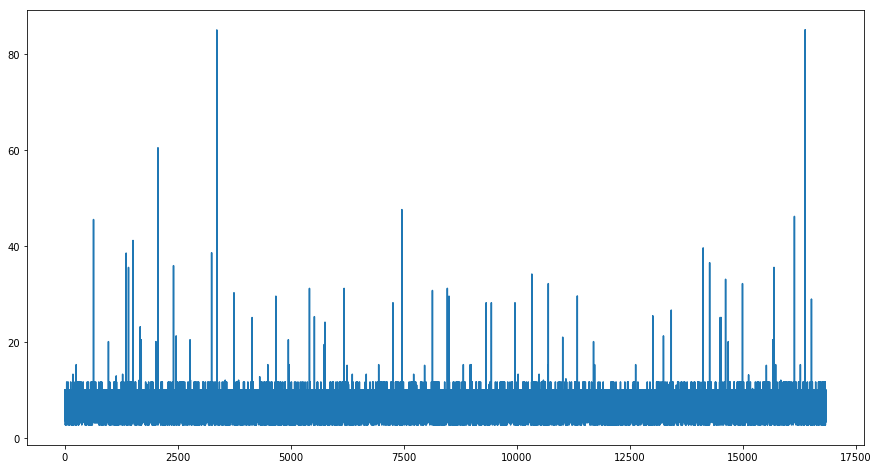

In [155]:
plt.figure(figsize=(15, 8))
plt.plot(norm_errors)
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(errors)
plt.show()